In [2]:
import json
import pandas as pd

train_sample_path = "/home/files/uos_plantclassification/data/plantnet/name_to_train_samples.json"
with open(train_sample_path, 'r') as file:
    train_samples = json.load(file)

def read_metric(path):
    metric = pd.read_csv(path)
    tmp = []
    for name in metric.name:
        tmp.append(train_samples[name])
    metric['train_samples'] = tmp
    return metric
    
def queryGenusNameInMetics(metrics, genus):
    return metrics[metrics.name.apply(lambda x : genus in x)].sort_values("train_samples", ascending=False)

In [3]:
genera = ['Nymphaea', 'Daphne', 'Smilax', 'Lamium', 'Lavandula', 'Anthurium', 'Dendrobium']


In [19]:
import numpy as np
from matplotlib import pyplot as plt

def plot_bar_graph(dict_path, genera):
    metrics = {}
    num_exp = len(dict_path)
    
    for exp_name, path in dict_path.items():
        metrics[exp_name] = read_metric(path)
    for genus in genera:
        recall_each_species = {}        
        for i, exp_name in enumerate(metrics.keys()):
            genera_metric = queryGenusNameInMetics(metrics[exp_name], genus)
            if i ==0:
                species_name = list(genera_metric.name)
            recall_each_species[exp_name] = list(genera_metric.recall)
            
        X = species_name
        X_axis = np.arange(len(species_name))
        bar_width = 0.8/num_exp
        for step, (key, value) in enumerate(recall_each_species.items()):
            plt.bar(X_axis-0.4+(step+0.5)*bar_width, value, bar_width, label=key)
        plt.xticks(X_axis, species_name)
        plt.xlabel('Species')
        plt.ylabel('Recall')
        plt.title(f'The recalls of species in {genus}')
        plt.legend()
        plt.show()

ValueError: dictionary update sequence element #0 has length 1; 2 is required

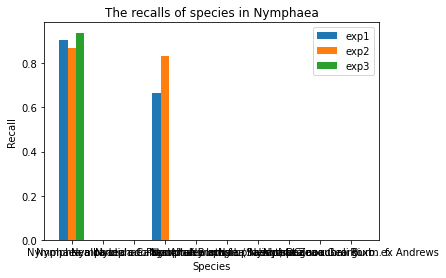

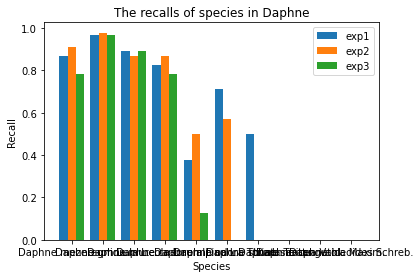

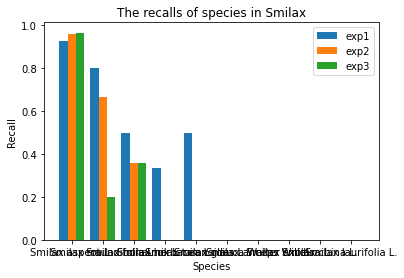

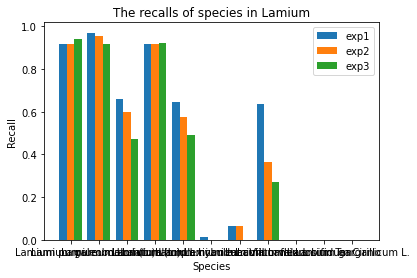

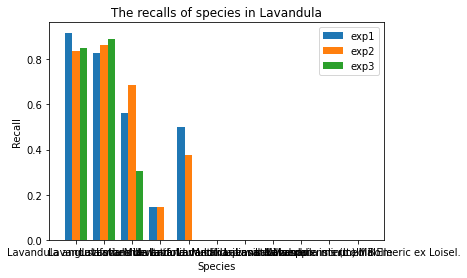

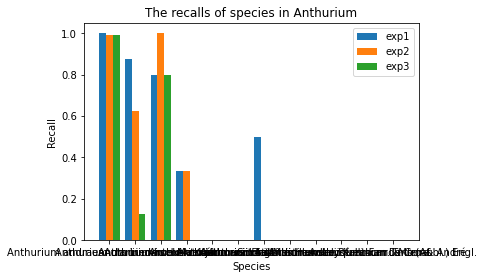

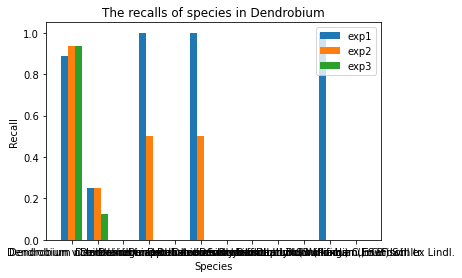

In [24]:
# dict_path = {"exp1": "/home/files/experiments/ablation_test/exp1/categorical_metrics_test.csv",
#              "exp2" : "/home/files/experiments/ablation_test/exp2/categorical_metrics_test.csv",
#              "exp3" : "/home/files/experiments/ablation_test/exp3/categorical_metrics_test.csv"}

dict_path = {}
test_name = ""
exps = ["exp1", "exp2", "exp3"]
for exp in exps:
    dict_path[exp] = f"/home/files/experiments/ablation_test/{test_name}/{exp}/categorical_metrics_test.csv"


plot_bar_graph(dict_path, genera)

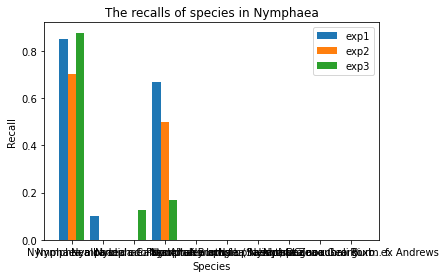

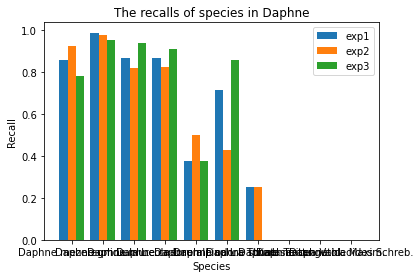

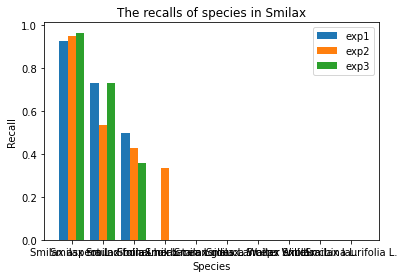

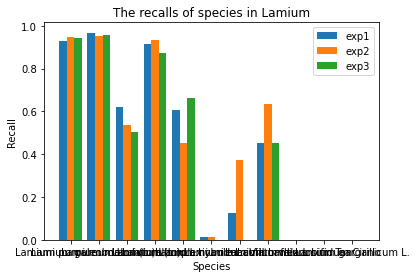

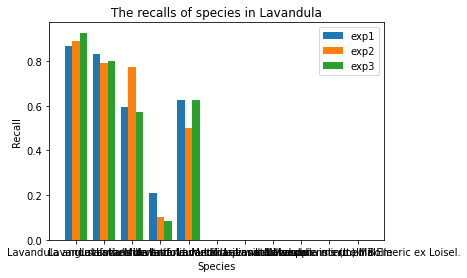

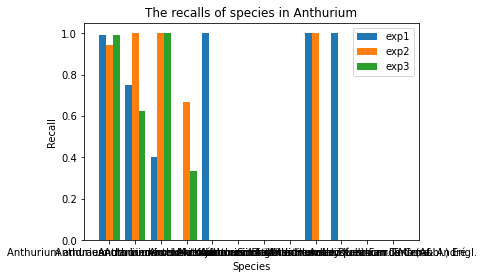

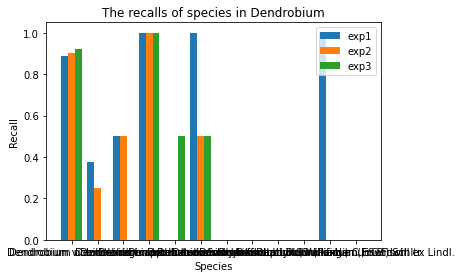

In [21]:


dict_path = {"exp1": "/home/files/experiments/ablation_test/no_schedule/exp1/categorical_metrics_test.csv",
             "exp2" : "/home/files/experiments/ablation_test/no_schedule/exp2/categorical_metrics_test.csv",
             "exp3" : "/home/files/experiments/ablation_test/no_schedule/exp3/categorical_metrics_test.csv"}

plot_bar_graph(dict_path, genera)

In [23]:
exp1 = read_metric("/home/files/experiments/ablation_test/exp1/categorical_metrics_test.csv")
queryGenusNameInMetics(exp1, "Dendrobium")

,Unnamed: 0,name,samples_per_class,precision,recall,train_samples
40,40,Dendrobium nobile Lindl.,62,0.887097,0.887097,492
73,73,Dendrobium victoriae-reginae Loher,8,0.250000,0.250000,63
54,54,Dendrobium spp.,2,0.000000,0.000000,16
43,43,Dendrobium crumenatum Sw.,2,1.000000,1.000000,13
52,52,Dendrobium closterium Rchb.f.,2,0.000000,0.000000,12
69,69,Dendrobium anosmum Lindl.,2,1.000000,1.000000,11
42,42,Dendrobium chrysotoxum Lindl.,1,0.000000,0.000000,8
72,72,Dendrobium thyrsiflorum B.S.Williams,2,0.000000,0.000000,8
44,44,Dendrobium moschatum (Buch.-Ham.) Sw.,1,0.000000,0.000000,6
53,53,Dendrobium aphyllum (Roxb.) C.E.C.Fisch.,1,0.000000,0.000000,6


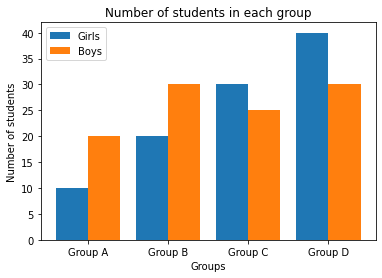

In [49]:
import numpy as np
from matplotlib import pyplot as plt

X = ['Group A', 'Group B', 'Group C', 'Group D']
Ygirls = [10, 20, 30, 40]
Zboys = [20, 30, 25, 30]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Ygirls, 0.4, label='Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label='Boys')
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of students")
plt.title("Number of students in each group")
plt.legend()
plt.show()